# Functional connectivity between subjects (IFSC)

- Use the `levels_betas.npy` data

see the [brainiak tutorial isc - 10](https://brainiak.org/tutorials/10-isc/) for more info

> The goal of ISFC is to find coupling between brain regions across participants. For example the angular gyrus in subject 1 could be correlated to the pre-frontal cortex in subject 2, if they share some cognitive state. For completely random cognitive states across these two subjects, the correlation should be zero. ISFC helps us identify such commonalities across subjects.

In [1]:
import warnings
import sys 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import os 
import glob
import time
from copy import deepcopy
import numpy as np
import pandas as pd 

from nilearn import datasets
from nilearn import surface
from nilearn import plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
import nibabel as nib

from brainiak import image, io
from brainiak.isc import isc, isfc, permutation_isc
import matplotlib.pyplot as plt
import seaborn as sns 

%autosave 5
%matplotlib inline
sns.set(style = 'white', context='talk', font_scale=1, rc={"lines.linewidth": 2})

Autosaving every 5 seconds


In [4]:
# specify local path
path = '/Users/Daphne/data/'

# parameters
num_subjects = 8

# Betas
levels_betas = np.load(path+'bold_data_levels.npy')

# load mask and get voxel coordinates
mask_arr = np.load(path+'mask_arr.npy') # all masks are the same
mask_mat = mask_arr[0] # so we can pick any one from the array
coords_mat = np.array(np.where(mask_mat == 1)) # so need one set of voxel coordinates for all
coords_mat[[0, 2]] = coords_mat[[2, 0]] # exchange the rows

'''load brain templates'''

# mask_nii is the functional mask, this selects the brain voxels
mask_nii = nib.load(os.path.join(path, 'mask.nii')) 

# we get the brain mask (boolean array) with the .dataobj method
brain_mask = np.array(mask_nii.dataobj)

# Get the list of nonzero voxel coordinates from the nii mask
coords_nii = np.where(brain_mask)

# this where we plot our mask ON (sometimes called brain_nii) - the anatomical/structural image
mean_nii = nib.load(os.path.join(path, 'mean.nii')) 

# nosmooth betas mask, has less voxels than mask_nii
nosmooth_mask_nii = nib.load(os.path.join(path, 'mask_nosmooth.nii'))

In [14]:
len(levels_betas[0,:,0])

220075

# Select voxels from predefined masks

number of voxels: 220075
number of parcels: 96


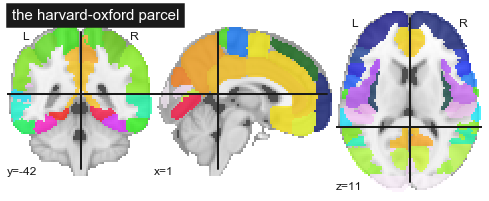

In [17]:
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm', symmetric_split=True)
plotting.plot_roi(atlas.maps, title='the harvard-oxford parcel')

n_regions = len(atlas.labels)-1 # rm background region 
n_TRs = len(levels_betas[:,0,0])

print(f'number of voxels: {len(levels_betas[0,:,0])}')
print(f'number of parcels: {n_regions}')